Contenido bajo licencia Creative Commons BY-NC-ND. El contenido de este Notebook es creado por Ana Beatriz Acevedo Jaramillo y Daniela González González 2020. Este material es parte del curso Análisis de Estructuras del programa de Ingeniería Civil de la Universidad EAFIT.

<img src= 
"http://www.eafit.edu.co/biblioteca/PublishingImages/logos/eafit_apa.jpg" 
         alt="GeeksforGeeks logo" 
         align="left">

# *Análisis matricial de cerchas planas*

<p style='text-align: justify;'> El siguiente programa fue desarrollado como parte del material de apoyo para realizar el análisis de cerchas planas. Debe tener en cuenta que los datos de entrada que aparecen en el programa por defecto corresponden al ejercicio explicado en el documento de word del anexo.</p>

### Sección de datos de entrada

<p style='text-align: justify;'> Esta sección contiene todas las matrices y datos que el programa utiliza para realizar el cálculo de las fuerzas internas, reacciones, etc. Estos datos pueden ser modificados dependiendo de la estructura tipo cercha que se desee analizar.</p>

In [1]:
import numpy as np
import xlrd 
from matplotlib import pyplot as plt

doc= xlrd.open_workbook('Datos_Programa.xlsx')
worksheet= doc.sheet_by_name("Cercha")


1.En la próxima celda se importa el valor de cada variable teniendo en cuenta la siguiente definición:

* Nn=Número de nodos
* NE=Número de elementos
* NGL=Número de grados de libertad
* NGLL=Número de grados de libertad libres
* NGLR=Número de grados de libertad restringidos

In [2]:
Nn= int(worksheet.cell_value(1,2)) 
NE=int(worksheet.cell_value(2,2)) 
NGL=int(worksheet.cell_value(3,2)) 
NGLL=int(worksheet.cell_value(4,2)) 
NGLR=int(worksheet.cell_value(5,2))

2. La siguiente celda importa la matriz de grados de libertad tal y como se muestra en la siguiente imagen:

\begin{bmatrix}
gxi_{0} &gyi_{0} &gxf_{0} &gyf_{0}\\
gxi_{1} &gyi_{1} &gxf_{1} &gyf_{1}\\
gxi_{2} &gyi_{2} &gxf_{2} &gyf_{2}\\
gxi_{n} &gyi_{n} &gxf_{n} &gyf_{n}\end{bmatrix}


In [3]:
MGL=np.zeros((NE,4))
for i in range (NE):
    for j in range(4):
        MGL[i,j]=int(worksheet.cell_value(i+1,4+j))


3. La siguiente celda importa las matrices de propiedades de los elementos. MA corresponde a la matriz de almacenamiento de áreas y ME a la matriz de almacenamiento de  módulos de elasticidad. Recuerde ser consistente con las unidades, para este ejercicio se usarán áreas en mm<sup>2</sup> y módulos en GPa.


\begin{bmatrix}
A_{0}\\A_{1}\\A_{2}\\A_{n}\end{bmatrix}



\begin{bmatrix}
E_{0}\\E_{1}\\E_{2}\\E_{n}\end{bmatrix}


In [4]:
MA=np.zeros((NE,1))
ME=np.zeros((NE,1))

for i in range(NE):
    MA[i,0]=float(worksheet.cell_value(i+1,9))
    ME[i,0]=float(worksheet.cell_value(i+1,10))
    

4. La siguiente celda importa la matriz de coordenadas de la estructura tal y como se muestra en la siguiente figura. Para este ejercicio, las distancias serán ingresadas en mm.

\begin{bmatrix}
xi_{0} &yi_{0} &xf_{0} &yf_{0}\\
xi_{1} &yi_{1} &xf_{1} &yf_{1}\\
xi_{2} &yi_{2} &xf_{2} &yf_{2}\\
xi_{n} &yi_{n} &xf_{n} &yf_{n}\end{bmatrix}


In [5]:
MC=np.zeros((NE,4))
for i in range(NE):
    for j in range(4):
        MC[i,j]=float(worksheet.cell_value(i+1,12+j))


5. La siguiente celda importa la matriz de cargas en los nodos y la matriz de desplazamiento en los grados de libertad restringidos. Para este ejercicio, se ingresaron las cargas en kN y los desplazamientos en mm.

In [6]:
F0=np.zeros((NGLL,1))#Fuerzas externas sobre los grados de libertad libres
U1=np.zeros((NGLR,1))#Desplazamientos en las reacciones
   
for i in range(NGLL):
    F0[i,0]=float(worksheet.cell_value(i+1,17))

for i in range(NGLR):
    U1[i,0]=float(worksheet.cell_value(i+NGLL+1,19))
   

### Sección de procesamiento de datos 

<p style='text-align: justify;'> En esta sección, el programa procesa los datos ingresados en las matrices de la sección de entrada de datos para realizar los cálculos necesarios. Se sugiere no modificar ninguna línea de código, a menos que se esté seguro del cambio a realizar, ya que esto puede dañar el programa y provocar que los resultados obtenidos no sean correctos. </p>

6. Cálculo de la matriz de longitud. 

In [7]:
ML=np.zeros((NE,1))
for i in range(NE):
    ML[i,0]=np.sqrt((worksheet.cell_value(i+1,14)-worksheet.cell_value(i+1,12))**2+(worksheet.cell_value(i+1,15)-worksheet.cell_value(i+1,13))**2)


C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


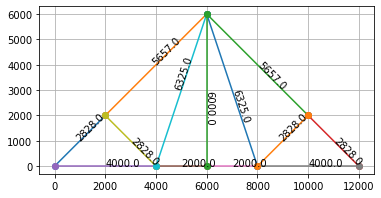

In [8]:
for i in range (NE):
    angle=np.arctan((MC[i,1]-MC[i,3])/(MC[i,0]-MC[i,2]))
    angle=angle*180/np.pi
    plt.plot([MC[i,0],MC[i,2]],[MC[i,1],MC[i,3]],marker='o')
    plt.text(MC[i,0]+(MC[i,2]-MC[i,0])/2,MC[i,1]+(MC[i,3]-MC[i,1])/2,np.round(float(ML[i]),decimals=0),rotation=angle, rotation_mode='anchor')
plt.grid()
plt.gca().set_aspect('equal', adjustable = 'box')


7. Cálculo de la matriz de rigidez local, se sugiere verificar en qué unidades queda definida esta matriz.

In [9]:
MAL=np.zeros((NE,4,4))
for i in range(NE):
    MAL[i,0,0]=(MA[i]*ME[i])/(ML[i][0])
    MAL[i,2,2]=MAL[i,0,0]
    MAL[i,0,2]=-MAL[i,0,0]
    MAL[i,2,0]=-MAL[i,0,0]

Modifique el valor de n del siguiente recuadro para visualizar la matriz de rigidez local del elemento que desee.

In [10]:
n=0

In [11]:
print(np.array(MAL[n]))

[[ 35.35533906   0.         -35.35533906   0.        ]
 [  0.           0.           0.           0.        ]
 [-35.35533906   0.          35.35533906   0.        ]
 [  0.           0.           0.           0.        ]]


8. Cálculo de la matriz de transformación.

In [12]:
MAT=np.zeros((NE,4,4))
for i in range(NE):
    MAT[i,0,0]=(MC[i][2]-MC[i][0])/(ML[i][0])
    MAT[i,1,0]=(MC[i][3]-MC[i][1])/(ML[i][0])
    MAT[i,2,2]=MAT[i,0,0]
    MAT[i,3,2]=MAT[i,1,0]
            

Modifique el valor de n del siguiente recuadro para visualizar la matriz de transformación del elemento que desee.

In [13]:
n=0

In [14]:
print(np.array(MAT[n]))

[[0.70710678 0.         0.         0.        ]
 [0.70710678 0.         0.         0.        ]
 [0.         0.         0.70710678 0.        ]
 [0.         0.         0.70710678 0.        ]]


9. Cálculo de la matriz de rigidez de cada elemento en coordenadas globales.

In [15]:
MAG=np.zeros((NE,4,4))
for i in range(NE):
    MAG[i]=np.dot(np.dot(MAT[i],MAL[i]),np.transpose(MAT[i]))  

Modifique el valor de n del siguiente recuadro para visualizar la matriz de rigidez en coordenadas globales del elemento que desee.

In [16]:
n=0

In [17]:
print(np.array(MAG[n]))

[[ 17.67766953  17.67766953 -17.67766953 -17.67766953]
 [ 17.67766953  17.67766953 -17.67766953 -17.67766953]
 [-17.67766953 -17.67766953  17.67766953  17.67766953]
 [-17.67766953 -17.67766953  17.67766953  17.67766953]]


10. Cálculo de la matriz de rigidez de la estructura

In [18]:
KG=np.zeros((NGL,NGL))
for i in range(NE):
    for j in range(4):
        for k in range(4):
            KG[int(MGL[i][k]-1),int(MGL[i][j]-1)]=KG[int(MGL[i][k]-1)][int(MGL[i][j]-1)]+MAG[i][j][k]

In [19]:
print(np.array(KG))

[[ 44.19417382   8.83883476  -8.83883476  -8.83883476   0.
    0.         -17.67766953  17.67766953   0.           0.
    0.           0.           0.           0.         -17.67766953
  -17.67766953]
 [  8.83883476  44.19417382  -8.83883476  -8.83883476   0.
    0.          17.67766953 -17.67766953   0.           0.
    0.           0.           0.           0.         -17.67766953
  -17.67766953]
 [ -8.83883476  -8.83883476  20.83994719   0.          -8.83883476
    8.83883476  -1.58113883  -4.74341649   0.           0.
   -1.58113883   4.74341649   0.           0.           0.
    0.        ]
 [ -8.83883476  -8.83883476   0.          62.80483514   8.83883476
   -8.83883476  -4.74341649 -14.23024947   0.         -16.66666667
    4.74341649 -14.23024947   0.           0.           0.
    0.        ]
 [  0.           0.          -8.83883476   8.83883476  44.19417382
   -8.83883476   0.           0.           0.           0.
  -17.67766953 -17.67766953 -17.67766953  17.67766953   0.
   

11. Subdivisión de la matriz de rigidez global de la estructura. 

In [20]:
K0 = KG[0:NGLL,0:NGLL]
K1 = KG[0:NGLL,NGLL:NGL]
K2 = KG[NGLL:NGL,0:NGLL]
K3 = KG[NGLL:NGL,NGLL:NGL]
      

12. Cálculo de reacciones y de desplazamiento en los grados de libertad libres.


In [21]:
Feff=F0-np.dot(K1,U1)
U0=np.dot((np.linalg.inv(K0)),Feff)       
F1=np.dot(K2,U0)+np.dot(K3,U1)


13.Definición de las matrices necesarias para realizar el cálculo de las fuerzas internas de cada elemento. 



In [22]:
U=np.concatenate((U0,U1))
MU=np.zeros((NE,4,1)) 
MFG=np.zeros((NE,4,1))
MFL=np.zeros((NE,4,1))
FELEM=np.zeros((NE,1))

14. Cálculo de las fuerzas internas de cada elemento.

In [23]:
for i in range(NE):
    for j in range(4):
        MU[i,j,0]=U[int(MGL[i][j])-1][0]
        
for i  in range(NE):
    MFG[i]=np.dot(MAG[i],MU[i])
       
for i  in range(NE):
    MFL[i]=np.dot(np.transpose(MAT[i]),MFG[i])

for i in range(NE):
    FELEM[i,0]=-MFL[i,0,0]

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


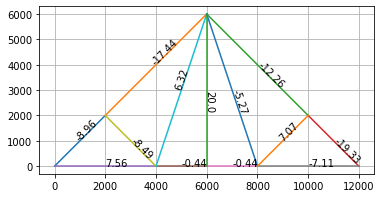

In [24]:

for i in range (NE):
    angle=np.arctan((MC[i,1]-MC[i,3])/(MC[i,0]-MC[i,2]))
    angle=angle*180/np.pi
    plt.plot([MC[i,0],MC[i,2]],[MC[i,1],MC[i,3]])
    plt.text(MC[i,0]+(MC[i,2]-MC[i,0])/2,MC[i,1]+(MC[i,3]-MC[i,1])/2,np.round(float(FELEM[i]),decimals=2),rotation=angle, rotation_mode='anchor')
plt.grid()
plt.gca().set_aspect('equal', adjustable = 'box')


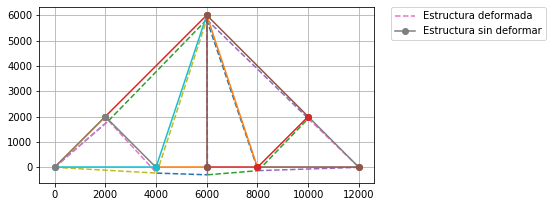

In [25]:
for i in range (NE):
    plt.plot([MC[i,0]+MU[i,0]*100,MC[i,2]+MU[i,2]*100],[MC[i,1]+MU[i,1]*100,MC[i,3]+MU[i,3]*100],linestyle='--')
    plt.plot([MC[i,0],MC[i,2]],[MC[i,1],MC[i,3]],marker='o')
plt.grid()
plt.plot([MC[0,0]+MU[0,0]*100,MC[0,2]+MU[0,2]*100],[MC[0,1]+MU[0,1]*100,MC[0,3]+MU[0,3]*100],linestyle='--',label = "Estructura deformada")
plt.plot([MC[0,0],MC[0,2]],[MC[0,1],MC[0,3]],marker='o', label = "Estructura sin deformar")
plt.legend(loc="upper left")
plt.gca().set_aspect('equal', adjustable = 'box')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()